In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('finalData.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Category,Age_Category,BMI,BMI_Category
0,0,0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,Ball based,20-29,24.7,18.5-24.9
1,1,1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,Combative,20-29,20.8,18.5-24.9
2,2,2,3,Gunnar Nielsen Aaby,M,24.0,174.916667,75.181818,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Ball based,20-29,24.6,18.5-24.9
3,3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Combative,30-39,NaN,>35
4,4,4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Other,20-29,24.0,18.5-24.9


In [ ]:
# Finding the first participant season of an athlete in the olympics
first_participation_data = data.sort_values(['ID','Year','Season'], ascending = (True,True,True))[['ID','Year','Season']]
print(len(first_participation_data))
first_participation_data = first_participation_data.groupby('ID').head(1)
print(len(first_participation_data))
first_participation_data.head(5)

271116
135571


,ID,Year,Season
0,1,1992,Summer
1,2,2012,Summer
2,3,1920,Summer
3,4,1900,Summer
4,5,1988,Winter


In [ ]:
data['ID'].nunique()

135571

In [ ]:
# Finding the first medal of an athlete in the olympics
datac = data.copy()
datac['Medal'] = datac['Medal'].apply(lambda x: 'No' if x=='None' else 'Yes')
first_medal_data = datac.sort_values(['ID','Medal','Year','Season','Sport','Event'], ascending = (True,False,True,True,True,True))[['ID','Medal','Year','Season']]
print(len(first_medal_data))
first_medal_data = first_medal_data.groupby('ID').head(1)
print(len(first_medal_data))
first_medal_data.head(5)

271116
135571


,ID,Medal,Year,Season
0,1,No,1992,Summer
1,2,No,2012,Summer
2,3,No,1920,Summer
3,4,Yes,1900,Summer
5,5,No,1988,Winter


In [ ]:
def get_already_olympian_status(row):
  year = int(row['Year'])
  season = str(row['Season'])
  first_year = int(first_participation_data[first_participation_data['ID'] == row['ID']]['Year'].values[0])
  first_season = str(first_participation_data[first_participation_data['ID'] == row['ID']]['Season'].values[0])
  if year < first_year:
    return 'No'
  elif (year== first_year) and (season==first_season):
    return 'No'
  elif (year== first_year) and (season=='Winter') and (first_season=='Summer') :
    return 'No'
  else:
    return 'Yes'
  

def get_already_medallist_status(row):
  medallist = str(first_medal_data[first_medal_data['ID']==row['ID']]['Medal'].values[0])
  year = int(row['Year'])
  season = str(row['Season'])
  first_medal_year = int(first_medal_data[first_medal_data['ID'] == row['ID']]['Year'].values[0])
  first_medal_season = str(first_medal_data[first_medal_data['ID'] == row['ID']]['Season'].values[0])
  if medallist=='Yes':
    if year < first_medal_year:
      return 'No'
    elif (year == first_medal_year) and (season == 'Winter') and (first_medal_season == 'Summer'):
      return 'No'
    elif (year == first_medal_year) and (season == first_medal_season):
      return 'No'
    else:
      return 'Yes'
  else:
    return 'No'

df = data[['ID','Year','Season','Sport','Event','Medal']]
df['Medal'] = df['Medal'].apply(lambda x: 'No' if x=='None' else 'Yes')
df['Already_Olympian'] = df.apply(lambda row: get_already_olympian_status(row),axis=1)
df['Already_Medallist'] = df.apply(lambda row: get_already_medallist_status(row),axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
first_year = int(first_participation_data[first_participation_data['ID'] == 1]['Year'])
first_season = str(first_participation_data[first_participation_data['ID'] == 1]['Season'])
year = int(1992)
season = str('Summer')
# (year== first_year) and (season==first_season)
print(len(first_season[1:]))


38


In [ ]:
df.head(20)

,ID,Year,Season,Sport,Event,Medal,Already_Olympian,Already_Medallist
0,1,1992,Summer,Basketball,Basketball Men's Basketball,No,No,No
1,2,2012,Summer,Judo,Judo Men's Extra-Lightweight,No,No,No
2,3,1920,Summer,Football,Football Men's Football,No,No,No
3,4,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Yes,No,No
4,5,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,No,No,No
5,5,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",No,No,No
6,5,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,No,Yes,No
7,5,1992,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",No,Yes,No
8,5,1994,Winter,Speed Skating,Speed Skating Women's 500 metres,No,Yes,No
9,5,1994,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",No,Yes,No


In [ ]:
first_participation_data.head()

,ID,Year,Season
0,1,1992,Summer
1,2,2012,Summer
2,3,1920,Summer
3,4,1900,Summer
4,5,1988,Winter


In [ ]:
df.to_csv('analysisData.csv')

In [ ]:
# Reading the data again

In [114]:
import pandas as pd
import numpy as np

In [115]:
data = pd.read_csv('analysisData_final.csv')

In [116]:
data.head()

,Unnamed: 0,ID,Year,Season,Sport,Event,Medal,Already_Olympian,Already_Medallist
0,0,1,1992,Summer,Basketball,Basketball Men's Basketball,No,No,No
1,1,2,2012,Summer,Judo,Judo Men's Extra-Lightweight,No,No,No
2,2,3,1920,Summer,Football,Football Men's Football,No,No,No
3,3,4,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Yes,No,No
4,4,5,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,No,No,No


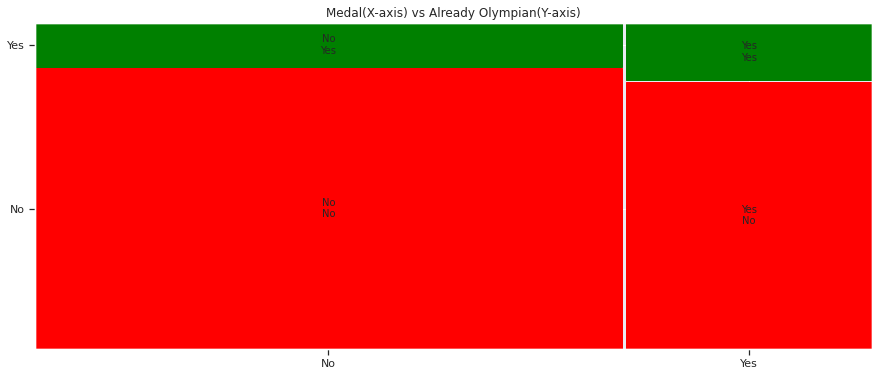

In [117]:
# Medal(X-axis) vs Already Olympian(Y-axis)
from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'green' if 'Yes'==key[1] else 'red'}
t = mosaic(data, ['Already_Olympian','Medal'],title='Medal(X-axis) vs Already Olympian(Y-axis)', \
           axes_label = True, properties=props)
t[0].set_size_inches(15, 6)

In [118]:
# Cross tabulation
ct = pd.crosstab(data.Already_Olympian,data.Medal,margins=True)

detailCt = ct.copy()
percent_yes = np.round(detailCt['Yes']/detailCt.All * 100,decimals=2)
percent_no = np.round(detailCt['No']/detailCt.All * 100,decimals=2)

totalPercent = np.round(detailCt.All/detailCt.All * 100,decimals=2)

detailCt['Yes'] = ct['Yes'].astype('str') + " (" + percent_yes.astype('str') + "%)"
detailCt['No'] = ct['No'].astype('str') + " (" + percent_no.astype('str') + "%)"


detailCt.All = ct.All.astype('str') + " (" + totalPercent.astype('str') + "%)"
detailCt

Medal,No,Yes,All
Already_Olympian,,,
No,165578 (86.57%),25695 (13.43%),191273 (100.0%)
Yes,65755 (82.36%),14088 (17.64%),79843 (100.0%)
All,231333 (85.33%),39783 (14.67%),271116 (100.0%)


In [119]:
# While 13.43 percent of first time olympians win medals, we see that 17.63 percent of olympians with
#   former participation experience win medals
# So, there is some significance here

In [120]:
# Chi square test to test significance
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print('Overall: ')
print("p-val = ", p)

Overall: 
p-val =  2.3509376862749443e-171


In [121]:
# p-value almost 0. Very close to zero.
# There is statistical significance. We can safely reject the null hypothesis 
# There is evidence of a relationship between an athlete's previous participation status and medal winning

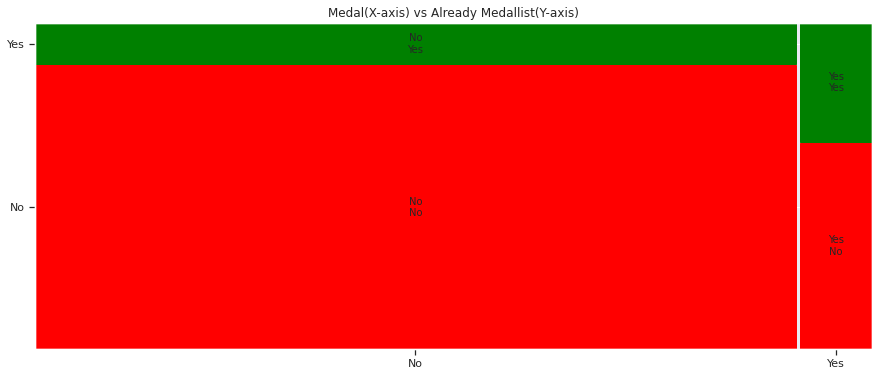

In [122]:
# Medal(X-axis) vs Already Olympian(Y-axis)
props = lambda key: {'color': 'green' if 'Yes'==key[1] else 'red'}
t = mosaic(data, ['Already_Medallist','Medal'],title='Medal(X-axis) vs Already Medallist(Y-axis)', \
           axes_label = True, properties = props)
t[0].set_size_inches(15, 6)

In [123]:
# Cross tabulation
ct = pd.crosstab(data.Already_Medallist,data.Medal,margins=True)

detailCt = ct.copy()
percent_yes = np.round(detailCt['Yes']/detailCt.All * 100,decimals=2)
percent_no = np.round(detailCt['No']/detailCt.All * 100,decimals=2)

totalPercent = np.round(detailCt.All/detailCt.All * 100,decimals=2)

detailCt['Yes'] = ct['Yes'].astype('str') + " (" + percent_yes.astype('str') + "%)"
detailCt['No'] = ct['No'].astype('str') + " (" + percent_no.astype('str') + "%)"


detailCt.All = ct.All.astype('str') + " (" + totalPercent.astype('str') + "%)"
detailCt

Medal,No,Yes,All
Already_Medallist,,,
No,216580 (87.37%),31308 (12.63%),247888 (100.0%)
Yes,14753 (63.51%),8475 (36.49%),23228 (100.0%)
All,231333 (85.33%),39783 (14.67%),271116 (100.0%)


In [124]:
# Here the effect is even more pronounced
# Atheletes who have alreaady been medallists in an event have almost three times the
#  chances(36.49%) of being a medallist in the current season than an athlete who has never won a medal before(12.63%).

In [125]:
# Chi square test to test significance
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print('Overall: ')
print("p-val = ", p)

Overall: 
p-val =  0.0


In [126]:
# p-value exactly 0.
# There is a strong statistical significance. We can safely reject the null hypothesis. 
# There is strong evidence of a relationship between an athlete's previous medal winning status and current 
# season's medal winning

In [127]:
# Getting the country data 
# (NOC - National Olympic Committee and not Team since a single NOC can have more than one Team)
data2 = pd.read_csv('finalData.csv')
data['NOC'] = data2['NOC']
data['Category'] = data2['Category']

In [128]:
data2.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Category,Age_Category,BMI,BMI_Category
0,0,0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,Ball based,20-29,24.7,18.5-24.9
1,1,1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,Combative,20-29,20.8,18.5-24.9
2,2,2,3,Gunnar Nielsen Aaby,M,24.0,174.916667,75.181818,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Ball based,20-29,24.6,18.5-24.9
3,3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Combative,30-39,NaN,>35
4,4,4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Other,20-29,24.0,18.5-24.9


In [129]:
# Selecting the medallists
data = data[data['Medal']=='Yes']
def get_category(x):
  if x['Already_Medallist'] == 'Yes':
    return 'Medallist'
  elif x['Already_Olympian'] == 'Yes':
    return 'Non Medallist'
  else:
    return 'First Timer'
  return None
data['Medal_Category'] = data.apply(lambda x: get_category(x),axis=1)

In [130]:
data.head()

,Unnamed: 0,ID,Year,Season,Sport,Event,Medal,Already_Olympian,Already_Medallist,NOC,Category,Medal_Category
3,3,4,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Yes,No,No,DEN,Combative,First Timer
37,37,15,1920,Summer,Swimming,Swimming Men's 200 metres Breaststroke,Yes,Yes,No,FIN,Athletic,Non Medallist
38,38,15,1920,Summer,Swimming,Swimming Men's 400 metres Breaststroke,Yes,Yes,No,FIN,Athletic,Non Medallist
40,40,16,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Yes,No,No,FIN,Ball based,First Timer
41,41,17,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Yes,No,No,FIN,Athletic,First Timer


In [131]:
x = data[data['Medal_Category']=='First Timer'].groupby(['NOC','Category'])['Medal_Category'].count().to_frame('First Timers')
x['Previously Medallists'] = data[data['Medal_Category']=='Medallist'].groupby(['NOC','Category'])['Medal_Category'].count().to_frame('Medallists')['Medallists']
x['Previously Non Medallists'] = data[data['Medal_Category']=='Non Medallist'].groupby(['NOC','Category'])['Medal_Category'].count().to_frame('Non Medallists')['Non Medallists']
x['Total Medallists'] = data.groupby(['NOC','Category'])['Medal_Category'].count().to_frame('Total Participants')['Total Participants']


In [132]:
x['First Timers'] = x['First Timers'] / x['Total Medallists']
x['Previously Medallists'] = x['Previously Medallists'] / x['Total Medallists']
x['Previously Non Medallists'] =x['Previously Non Medallists'] / x['Total Medallists']


In [133]:
x.head()

First Timers  ...  Total Medallists
NOC Category                 ...                  
AFG Combative      0.500000  ...                 2
AHO Other          1.000000  ...                 1
ALG Athletic       0.444444  ...                 9
    Combative      0.500000  ...                 8
ANZ Athletic       0.833333  ...                12

[5 rows x 4 columns]

In [134]:
x = x.fillna(0)

In [135]:
x = x.reset_index()

In [141]:
x['First Timers'].max()

1.0

Ratio of first timers becoming medallists: 


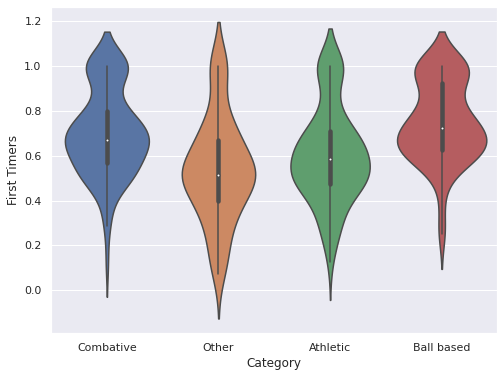

In [139]:
# violin plot
import seaborn as sns
print('Ratio of first timers becoming medallists: ')
sns.set(rc={'figure.figsize':(8,6)})
sns.violinplot(x = 'Category', y = 'First Timers', data = x)

Ratio of previously medal winners becoming medallists: 


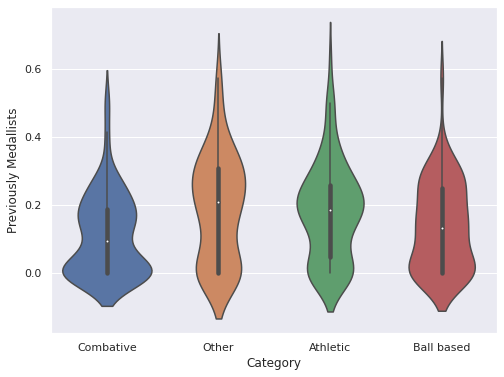

In [140]:
# violin plot
import seaborn as sns
print('Ratio of previously medal winners becoming medallists: ')
sns.set(rc={'figure.figsize':(8,6)})
sns.violinplot(x = 'Category', y = 'Previously Medallists', data = x)

Ratio of previously non-medallists becoming medallists: 


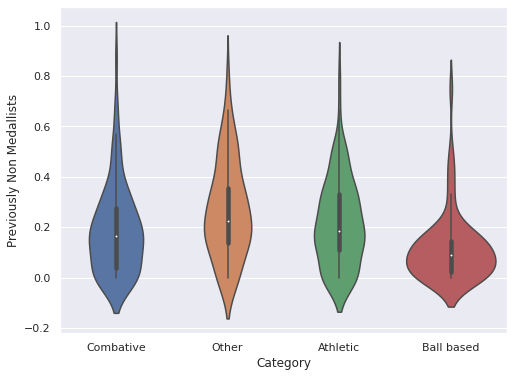

In [142]:
# violin plot
import seaborn as sns
print('Ratio of previously non-medallists becoming medallists: ')
sns.set(rc={'figure.figsize':(8,6)})
sns.violinplot(x = 'Category', y = 'Previously Non Medallists', data = x)

In [ ]:
# Stronger presence of first timers winning medals